In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
from pyfaidx import Fasta
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

In [3]:
mt_df = pd.read_csv('../data/05_mastertable/poder_master_table_fixed_genics.tsv', sep='\t')
# mt_df = mt_df.loc[mt_df['filter']=='pass']
mt_df['pop_spec_t'] = (mt_df.population_sharing==1)&\
                      (mt_df.sample_sharing>1)

In [4]:
mt_df[['isoform', 'structural_category']].groupby('structural_category').nunique()

,isoform
structural_category,
Antisense,1002
FSM,114578
Fusion,1066
Genic,114
Intergenic,731
NIC,17425
NNC,20959


In [7]:
mt_df[['geneid.v', 'structural_category']].groupby('structural_category').nunique()

,geneid.v
structural_category,
Antisense,648
FSM,22383
Fusion,584
Genic,90
Intergenic,476
NIC,4884
NNC,6229


In [6]:
mt_df.columns

Index(['isoform', 'geneid.v', 'associated_gene_biotype',
       'proteinv47_Chromosome', 'proteinv47_Start', 'proteinv47_Stop',
       'proteinv47_Strand', 'proteinv47_Source', 'proteinv47_CDS_Source',
       'proteinv47_CDS_Start',
       ...
       'CDS_genomic_end', 'predicted_NMD', 'perc_A_downstream_TTS',
       'seq_A_downstream_TTS', 'ORF_seq', 'annotated', 'predicted_ORF',
       'proteinv47_predicted_ORF', 'associated_gene_biotype_sub',
       'pop_spec_t'],
      dtype='object', length=116)

## Number of transcripts per gene by gene type

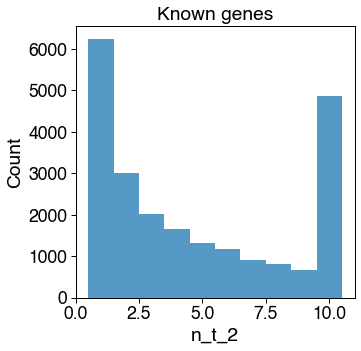

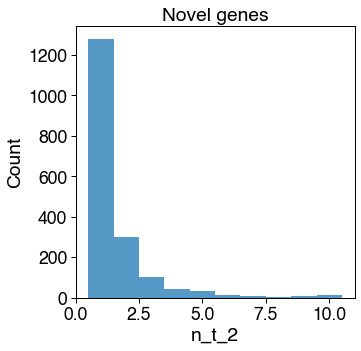

In [16]:
mt_df['gene_novelty'] = 'Novel'
things = ['FSM', 'NIC', 'NNC']
mt_df.loc[mt_df.structural_category.isin(things), 'gene_novelty'] = 'Known'

temp = mt_df[['gene_novelty', 'geneid.v', 'isoform']].groupby(['gene_novelty', 'geneid.v']).nunique().reset_index().rename({'isoform':'n_t'}, axis=1)
 
max_t = 10
temp['n_t_2'] = temp.n_t
temp.loc[temp.n_t >= 10, 'n_t_2'] = 10

init_plot_settings(aspect='square')

for t in temp.gene_novelty.unique().tolist():
    temp2 = temp.loc[temp.gene_novelty==t]
    ax = sns.histplot(temp2, 
                 x='n_t_2',
                 discrete=True,
                 edgecolor=None)
    ax.set(title=f'{t} genes')
    plt.show()
    